In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

import random

# import clear_output
import os
import seaborn as sns


### Lock and load

In [39]:
def dataRetriever(ticker_list):
    df = []
    for i in range(0,len(ticker_list),1):
        individual_stock_data = yf.download(ticker_list[i], start="2015-02-19", end="2025-02-18")
        df.append(individual_stock_data)
    return df

In [40]:
my_stocks = ["EQNR.OL", "AKRBP.OL", "SUBC.OL", "BWO.OL",
            "ORK.OL", "MOWI.OL", "SALM.OL", "LSG.OL",
            "NHY.OL", "YAR.OL", "RECSI.OL", "BRG.OL",
            "TEL.OL", "NOD.OL", "ATEA.OL", "BOUV.OL",
            "STB.OL", "DNB.OL", "GJF.OL", "MING.OL",
            "WAWI.OL", "SNI.OL", "BELCO.OL", "ODF.OL"]
my_data = dataRetriever(my_stocks)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [41]:
close_values = [[my_data[i]["Close"].iloc[x][0] for i in range(len(my_data))] 
                for x in range(min([len(my_data[i]["Close"]) for i in range(len(my_data))]))]

# sustainalytics
esg_scores = [36.6, 35.3, 17.9, 18, 
              18, 21.2, 18.7, 29.2, 
              15.7, 25.6, 25.6, 18.4, 
              19.8, 13.8, 18.1, 19, 
              17.2, 14, 17.2, 19.5, 
              19.7, 21.2, 26.8, 19.3]

esg_cat = ['high(+)', 'high(+)', 'low(+)', 'low(+)',
           'low(+)', 'medium(-)', 'low(+)', 'medium(+)',
           'low(+)', 'medium(+)', 'medium(+)', 'low(+)', # split each five
           'low(+)', 'low(-)', 'low(+)', 'low(+)', 
           'low(+)', 'low(-)', 'low(+)', 'low(+)', 
           'low(+)', 'medium(-)', 'medium(+)', 'low(+)']


# OBX and our own labeling
Sectors = ['Energy', 'Energy', 'Energy', 'Energy',
           'Consumables', 'Consumables', 'Consumables', 'Consumables',
           'Materials', 'Materials', 'Materials', 'Materials',
           'Technology', 'Technology', 'Technology', 'Technology',
           'Financial services', 'Financial services', 'Financial services', 'Financial services',
           'Shipping', 'Shipping', 'Shipping', 'Shipping' ]

In [42]:
# Create useful df's

df_close = pd.DataFrame(close_values, columns=[my_stocks])
df_close.index = pd.date_range(start='2015-02-19', periods=len(close_values), freq='D')

df_return = df_close.pct_change()
cumulative_return = (1 + df_return).cumprod()
cumulative_return.iloc[0, :] = 1  

df_normalized = df_close - df_close.iloc[0]

z_scores = df_close.apply(lambda x: (x - x.mean()) / x.std(), axis=0)


### Cumulative returns (all)

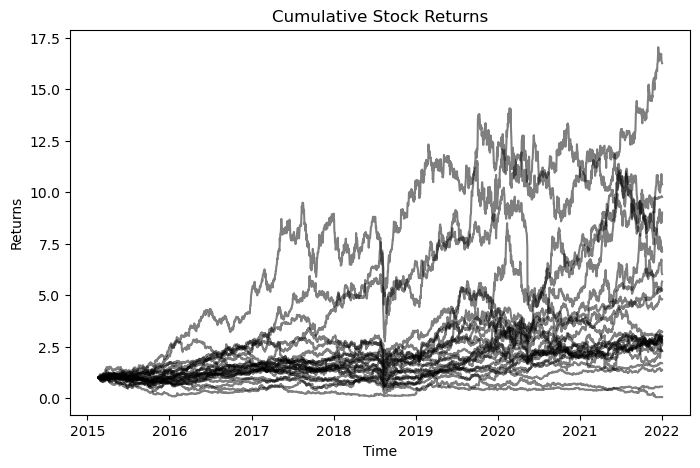

In [56]:
# Plot historical returns
plt.figure(figsize=(8, 5))
plt.plot(cumulative_return, linestyle='-', color='black', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('Cumulative Stock Returns')
plt.show()


### By sector return vs ESG

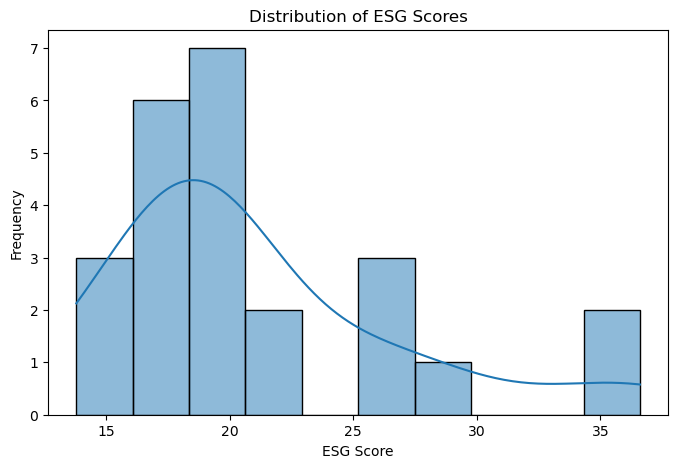

In [44]:
# ESG distribution
plt.figure(figsize=(8, 5))
sns.histplot(esg_scores, bins=10, kde=True)

plt.xlabel("ESG Score")
plt.ylabel("Frequency")
plt.title("Distribution of ESG Scores")
plt.show()


In [45]:
# df for scatterplot

avg_returns = df_return.mean()
df_stocks = pd.DataFrame({
    'ESG Score': esg_scores,
    'Avg Return': avg_returns,
    'Sector': Sectors })

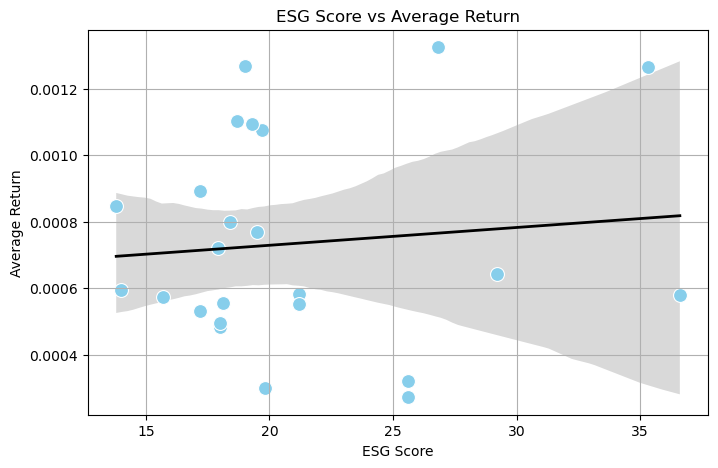

In [46]:
# Scatter plot of ESG Score vs Average Return
plt.figure(figsize=(8, 5))
sns.regplot(x='ESG Score', y='Avg Return', data=df_stocks, scatter_kws={'color': 'b'}, line_kws={'color': 'black', 'linewidth': 2})
sns.scatterplot(x='ESG Score', y='Avg Return', data=df_stocks, s=100, color='skyblue')

# Labels and title
plt.xlabel("ESG Score")
plt.ylabel("Average Return")
plt.title("ESG Score vs Average Return")
plt.grid(True)

# Show plot
plt.show()


In [59]:
df_stocks.describe

<bound method NDFrame.describe of           ESG Score  Avg Return              Sector
EQNR.OL        36.6    0.000581              Energy
AKRBP.OL       35.3    0.001266              Energy
SUBC.OL        17.9    0.000721              Energy
BWO.OL         18.0    0.000482              Energy
ORK.OL         18.0    0.000495         Consumables
MOWI.OL        21.2    0.000582         Consumables
SALM.OL        18.7    0.001103         Consumables
LSG.OL         29.2    0.000642         Consumables
NHY.OL         15.7    0.000572           Materials
YAR.OL         25.6    0.000273           Materials
RECSI.OL       25.6    0.000321           Materials
BRG.OL         18.4    0.000798           Materials
TEL.OL         19.8    0.000299          Technology
NOD.OL         13.8    0.000847          Technology
ATEA.OL        18.1    0.000555          Technology
BOUV.OL        19.0    0.001267          Technology
STB.OL         17.2    0.000893  Financial services
DNB.OL         14.0    0.00059

### By sector cumu return and z score

In [48]:
# creating sector dataframes


sector_cumu = {}
for stock, sector in zip(cumulative_return.columns, Sectors):
    if sector not in sector_cumu:
        sector_cumu[sector] = pd.DataFrame()
    sector_cumu[sector][stock] = cumulative_return[stock]

sector_z = {}
for stock, sector in zip(z_scores.columns, Sectors):
    if sector not in sector_z:
        sector_z[sector] = pd.DataFrame()
    sector_z[sector][stock] = z_scores[stock]

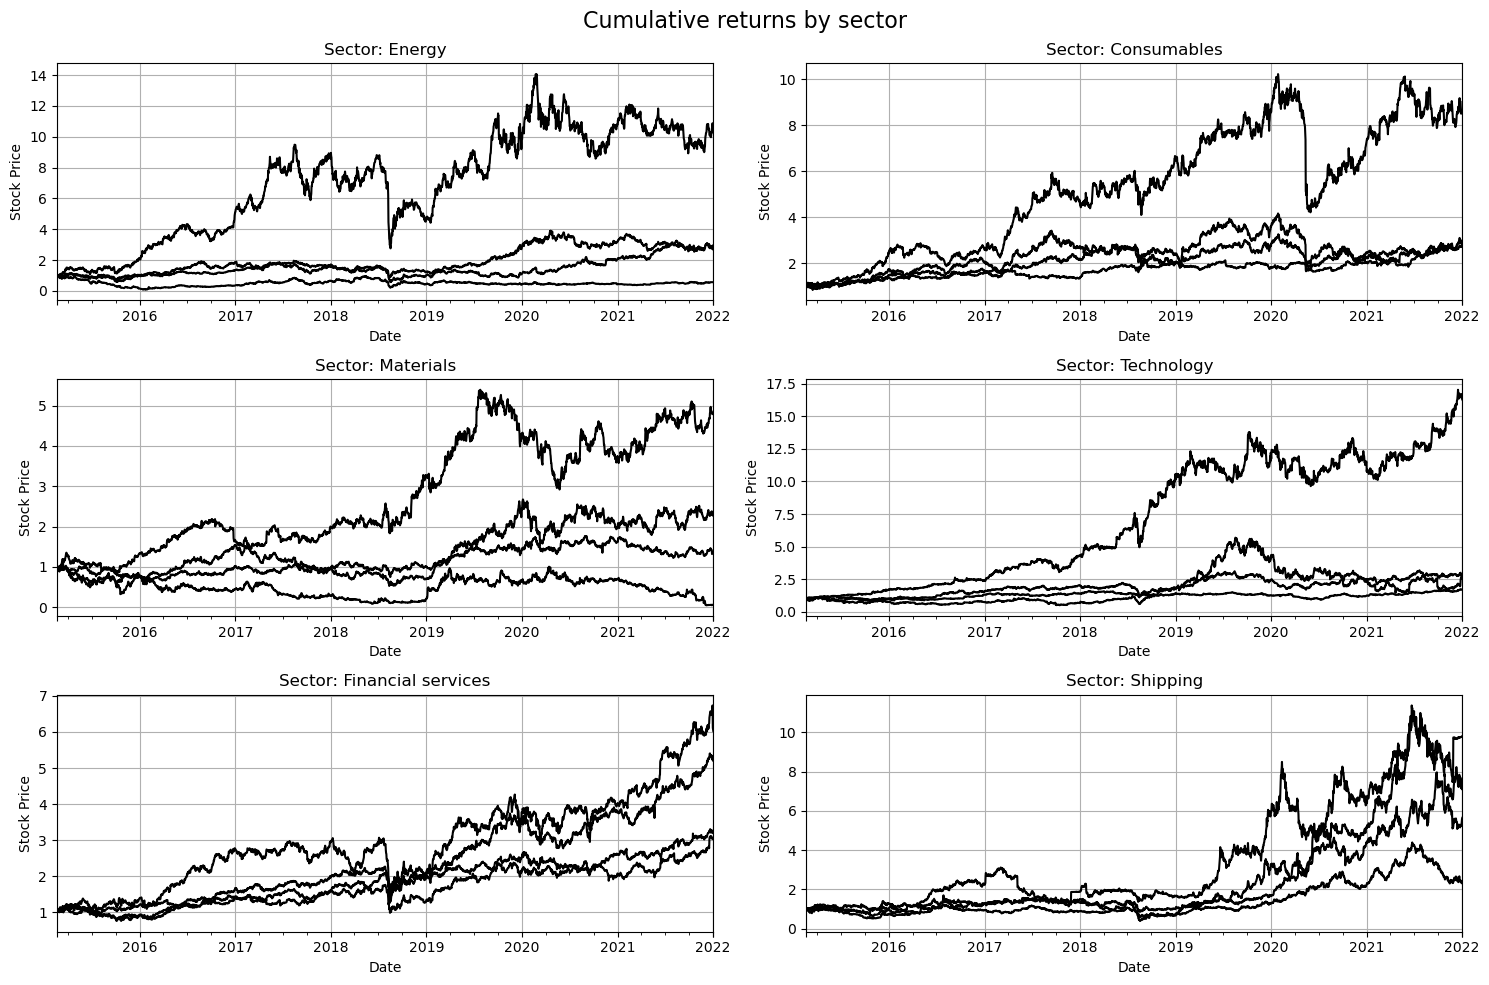

In [49]:
# Define the number of rows and columns for subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot each sector in its own subplot
for i, (sector, sector_cumu) in enumerate(sector_cumu.items()):
    ax = axes[i]
    sector_cumu.plot(ax=ax, legend=False, color='black')  # Plot stocks in sector
    ax.set_title(f"Sector: {sector}")  # Title for each subplot
    ax.set_xlabel("Date")
    ax.set_ylabel("Stock Price")
    ax.grid(True)

# Adjust layout and show the plot
plt.suptitle('Cumulative returns by sector', fontsize=16)
plt.tight_layout()
plt.show()

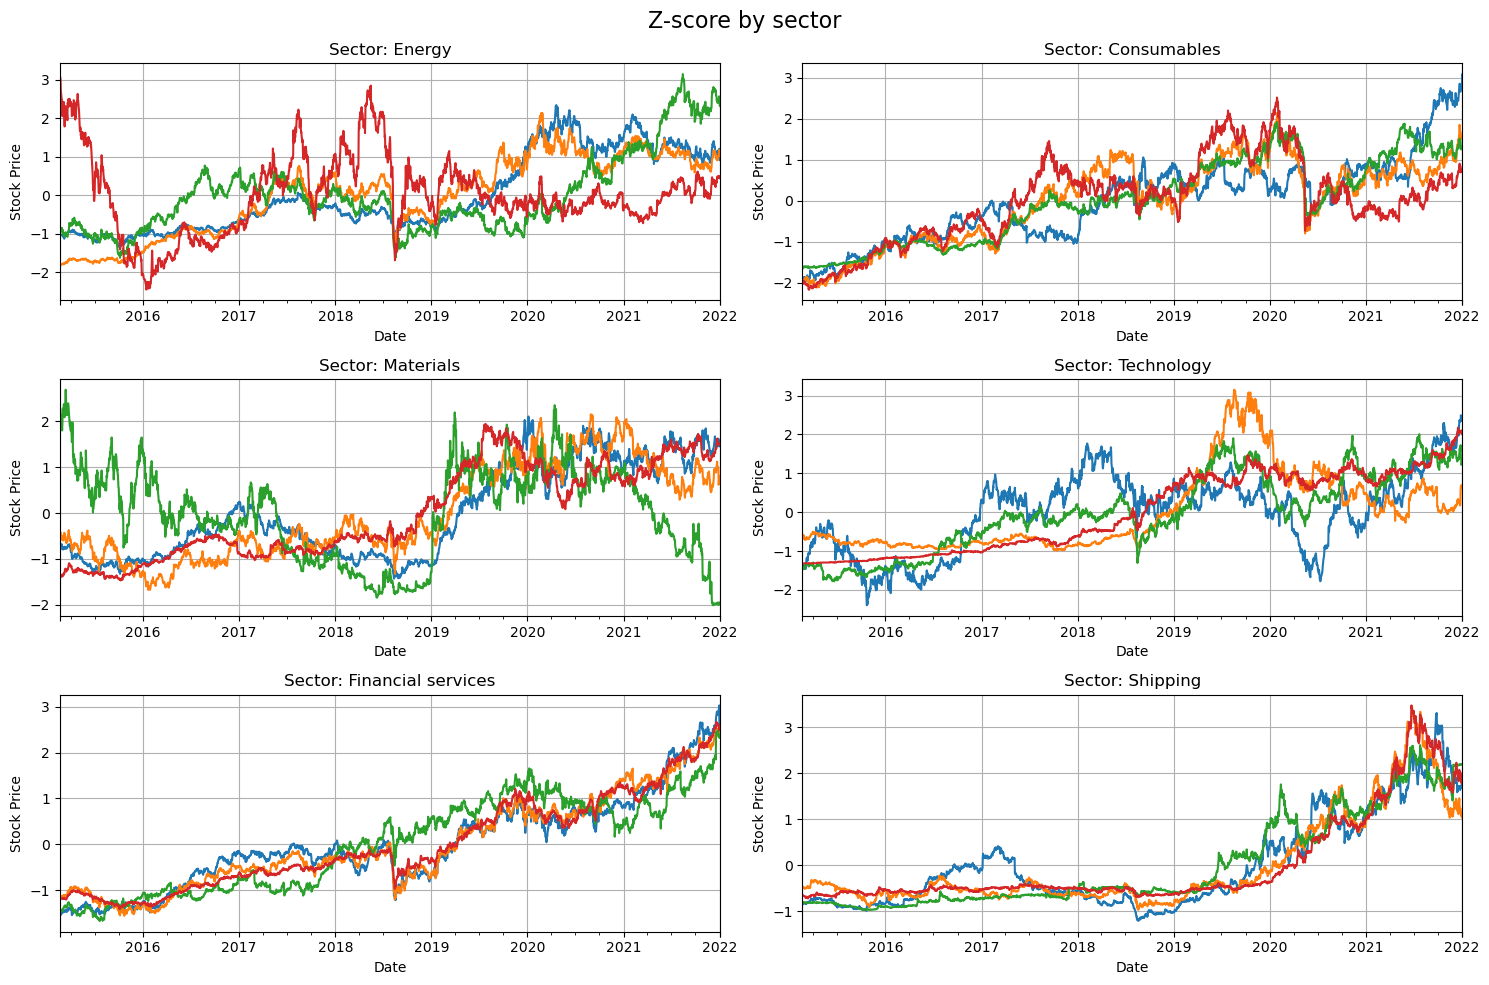

In [50]:
# Define the number of rows and columns for subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot each sector in its own subplot
for i, (sector, sector_z) in enumerate(sector_z.items()):
    ax = axes[i]
    sector_z.plot(ax=ax, legend=False)  # Plot stocks in sector
    ax.set_title(f"Sector: {sector}")  # Title for each subplot
    ax.set_xlabel("Date")
    ax.set_ylabel("Stock Price")
    ax.grid(True)

# Adjust layout and show the plot
plt.suptitle('Z-score by sector', fontsize=16)
plt.tight_layout()
plt.show()

### cumulative return with esg score heatmap

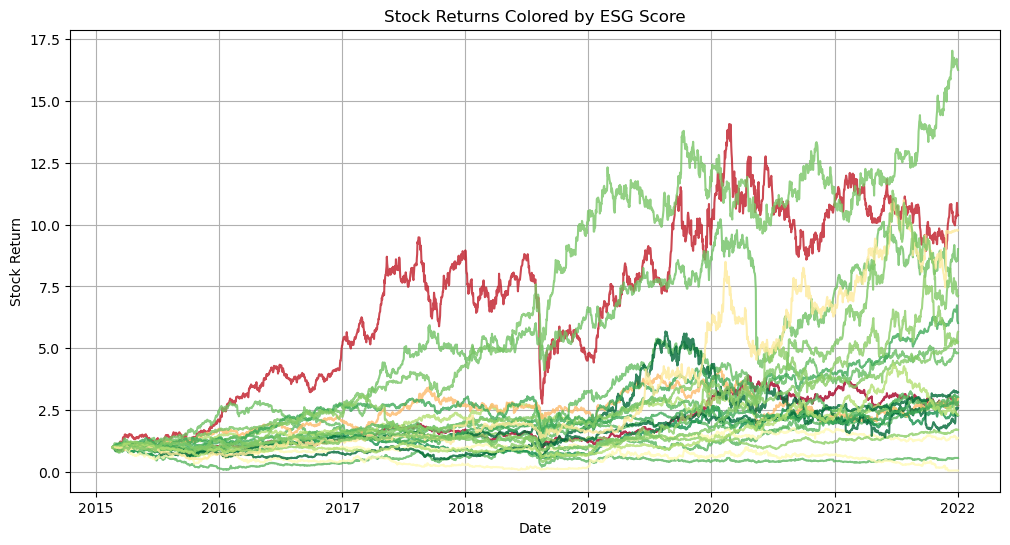

In [51]:


# Step 2: Normalize ESG scores to range [0, 1] for colormap mapping
esg_scores = np.array(esg_scores)  # Ensure it's a NumPy array
esg_min, esg_max = esg_scores.min(), esg_scores.max()
normalized_esg = (esg_scores - esg_min) / (esg_max - esg_min)  # Normalize

# Step 3: Generate colors using a colormap (green = low ESG, red = high ESG)
cmap = plt.cm.RdYlGn_r  # Reverse RdYlGn to make low = green, high = red
colors = [cmap(score) for score in normalized_esg]

# Step 4: Plot the stock returns with ESG-based colors
plt.figure(figsize=(12, 6))
for stock, color in zip(cumulative_return.columns, colors):
    plt.plot(cumulative_return.index, cumulative_return[stock], color=color, label=stock, alpha=0.8)

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Stock Return")
plt.title("Stock Returns Colored by ESG Score")
plt.grid(True)
plt.show()

### Boxplot of return by esg category

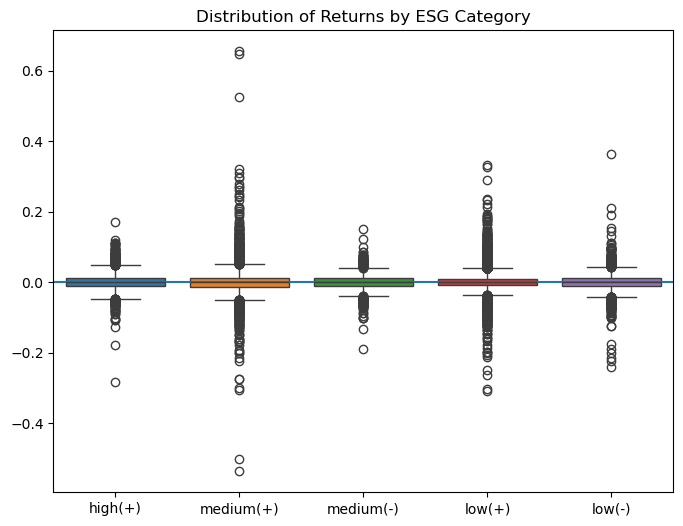

In [52]:
categorized_returns = {'high(+)': [], 'medium(+)': [], 'medium(-)': [], 'low(+)': [], 'low(-)': []}

for i, stock in enumerate(df_return.columns):
    category = esg_cat[i]  # Get the ESG category for the current stock
    returns = df_return[stock].values   # Get the returns for the stock
    categorized_returns[category].extend(returns)  # Add returns to the appropriate category


# Plot boxplot of returns by ESG category
plt.figure(figsize=(8, 6))
sns.boxplot(data=categorized_returns)
plt.title('Distribution of Returns by ESG Category')
plt.axhline()
plt.show()

### Risk-return sactter with ESG size

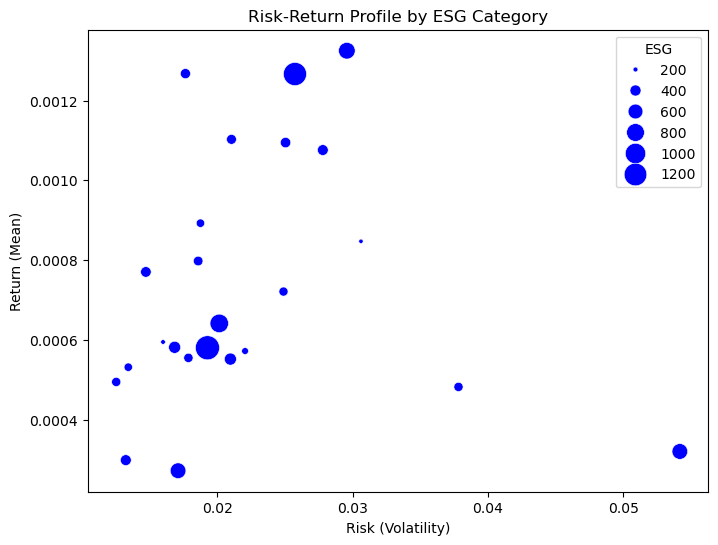

In [53]:
# Calculate risk (standard deviation) and return (mean) for each stock
risk = df_return.std()  # Volatility (Standard deviation)
mean_return = df_return.mean()  # Average returns

# Create a DataFrame for plotting
risk_return_df = pd.DataFrame({'Risk': risk, 'Return': mean_return, 'ESG':esg_scores})


# Plot the risk-return profile
plt.figure(figsize=(8, 6))
sns.scatterplot( x=risk_return_df['Risk'], y=risk_return_df['Return'], size=risk_return_df['ESG']**2, color='blue', sizes=(10,300))
plt.title('Risk-Return Profile by ESG Category')
plt.xlabel('Risk (Volatility)')
plt.ylabel('Return (Mean)')
plt.show()